In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from emgen import *
import matplotlib.pyplot as plt
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [3]:
if not t.cuda.is_available():
    print('Should have CUDA for faster computation')

Should have CUDA for faster computation


In [4]:
model = emgen_model()
dataloader = emgen_dataloader('./data/labels.csv', './data')

history_cb = GetMetrics()
callbacks = [EarlyStopping(monitor='train_loss', # Change to val_loss with real dataset
                           min_delta=.01,
                           patience=5,
                           mode='min',
                           verbose=False),
             history_cb]
trainer = pl.Trainer(max_epochs=10, callbacks=callbacks)
trainer.fit(model, dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name    | Type      | Params
--------------------------------------
0 | relu    | ReLU      | 0     
1 | maxpool | MaxPool2d | 0     
2 | flatten | Flatten   | 0     
3 | linear  | Linear    | 46.1 K
--------------------------------------
46.1 K    Trainable params
0         Non-trainable params
46.1 K    Total params
0.184     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/mnt/c/Users/thema/repos/emgen/env/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/mnt/c/Users/thema/repos/emgen/env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:322: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/mnt/c/Users/thema/repos/emgen/env/lib/python3.9/site-packages/pytorch_lightning/trainer/callback_hook.py:102: LightningDeprecationWarning: The signature of `Callback.on_train_epoch_end` has changed in v1.3. `outputs` parameter has been removed. Support for the old signature will be removed in v1.5
  warning_cache.deprecation(


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

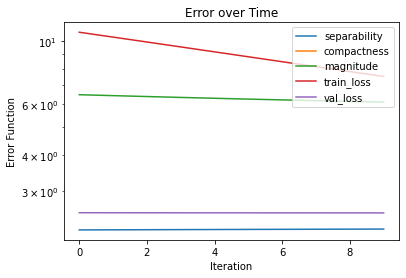

In [5]:
plot_training(history_cb.history_train)

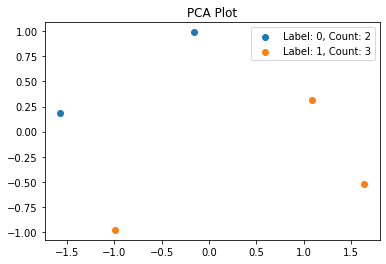

In [6]:
batch = next(iter(dataloader.train_dataloader()))
embeddings = model(batch[0])
labels = batch[1]
pca_visualize(embeddings, labels)